In [1]:
from data.nyuv2 import NYUDepthV2
from torchvision import transforms

t = transforms.Compose([transforms.CenterCrop(400), transforms.ToTensor()])
dataset = NYUDepthV2(root='data', download=True, image_transform=t, seg_transform=t, depth_transform=t)

Dataset already exists, skipping download.


In [2]:
import matplotlib.pyplot as plt

image, seg, depth = dataset[0]

image.shape, seg.shape, depth.shape

(torch.Size([400, 400, 3]), torch.Size([400, 400]), torch.Size([400, 400]))

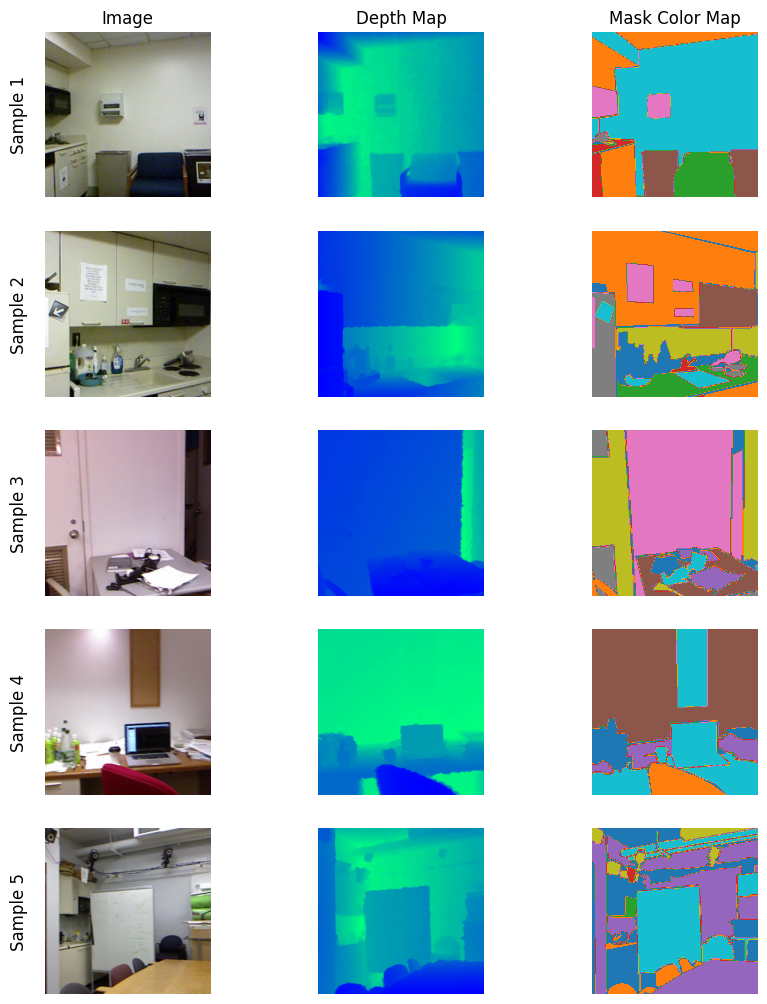

In [30]:
import matplotlib.pyplot as plt
import numpy as np

N_SAMPLES = 5

plt.figure(figsize=(10, 2.5 * N_SAMPLES))
for i in range(N_SAMPLES):
    rgb_image, segmentation_mask, depth_map = dataset[i]

    # Plot the RGB image
    plt.subplot(N_SAMPLES, 3, i * 3 + 1)
    plt.imshow(rgb_image)
    if i == 0:
        plt.title("Image")
    plt.axis('off')
    
    plt.annotate(f"Sample {i+1}", xy=(-0.1, 0.5), xycoords='axes fraction', 
                 fontsize=12, ha='right', va='center', rotation=90)

    plt.subplot(N_SAMPLES, 3, i * 3 + 2)
    plt.imshow(depth_map, cmap='winter')
    if i == 0:
        plt.title("Depth Map")
    plt.axis('off')

    plt.subplot(N_SAMPLES, 3, i * 3 + 3)
    plt.imshow(segmentation_mask, cmap='tab10')
    if i == 0:
        plt.title("Mask Color Map")
    plt.axis('off')
    
plt.show()